In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THreads"]= "1"

In [38]:
exam_data = pd.read_csv("/content/MathE.csv", encoding='latin-1')
exam_data.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,647,Ireland,77,0,Basic,Statistics,Statistics,Stem and Leaf diagram,NaN,NaN,NaN,NaN,NaN
1,41,Portugal,77,1,Basic,Statistics,Statistics,Stem and Leaf diagram,NaN,NaN,NaN,NaN,NaN
2,340,Portugal,77,1,Basic,Statistics,Statistics,Stem and Leaf diagram,NaN,NaN,NaN,NaN,NaN
3,641,Italy,77,0,Basic,Statistics,Statistics,Stem and Leaf diagram,NaN,NaN,NaN,NaN,NaN
4,669,Portugal,77,1,Basic,Statistics,Statistics,Stem and Leaf diagram,NaN,NaN,NaN,NaN,NaN


In [45]:
# Dropping unnamed columns and handling missing data
data_cleaned = exam_data.drop(columns=[col for col in exam_data.columns if 'Unnamed' in col])
data_cleaned.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,Stem and Leaf diagram
1,41,Portugal,77,1,Basic,Statistics,Statistics,Stem and Leaf diagram
2,340,Portugal,77,1,Basic,Statistics,Statistics,Stem and Leaf diagram
3,641,Italy,77,0,Basic,Statistics,Statistics,Stem and Leaf diagram
4,669,Portugal,77,1,Basic,Statistics,Statistics,Stem and Leaf diagram


In [40]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         8943 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [16]:
data_cleaned.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Student ID,9546.0,NaN,NaN,NaN,775.402263,460.590559,26.0,380.0,885.0,1219.0,1565.0
Student Country,9546,8,Portugal,5495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Question ID,9546.0,NaN,NaN,NaN,478.912319,249.244061,77.0,323.0,428.0,571.0,1549.0
Type of Answer,9546.0,NaN,NaN,NaN,0.468259,0.499018,0.0,0.0,0.0,1.0,1.0
Question Level,9546,2,Basic,7844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,9546,14,Linear Algebra,5726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subtopic,9546,24,Vector Spaces,2749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Keywords,8943,150,Subspace,1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data_cleaned.shape

(9546, 8)

In [13]:
data_cleaned.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Student ID,9546.0,NaN,NaN,NaN,775.402263,460.590559,26.0,380.0,885.0,1219.0,1565.0
Student Country,9546,8,Portugal,5495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Question ID,9546.0,NaN,NaN,NaN,478.912319,249.244061,77.0,323.0,428.0,571.0,1549.0
Type of Answer,9546.0,NaN,NaN,NaN,0.468259,0.499018,0.0,0.0,0.0,1.0,1.0
Question Level,9546,2,Basic,7844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,9546,14,Linear Algebra,5726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subtopic,9546,24,Vector Spaces,2749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Keywords,8943,150,Subspace,1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Select relevant columns for clustering
columns_to_use = ['Question ID', 'Type of Answer', 'Question Level', 'Topic', 'Subtopic']
data_cleaned= data_cleaned[columns_to_use]
data_cleaned.head()

,Question ID,Type of Answer,Question Level,Topic,Subtopic
0,77,0,Basic,Statistics,Statistics
1,77,1,Basic,Statistics,Statistics
2,77,1,Basic,Statistics,Statistics
3,77,0,Basic,Statistics,Statistics
4,77,1,Basic,Statistics,Statistics


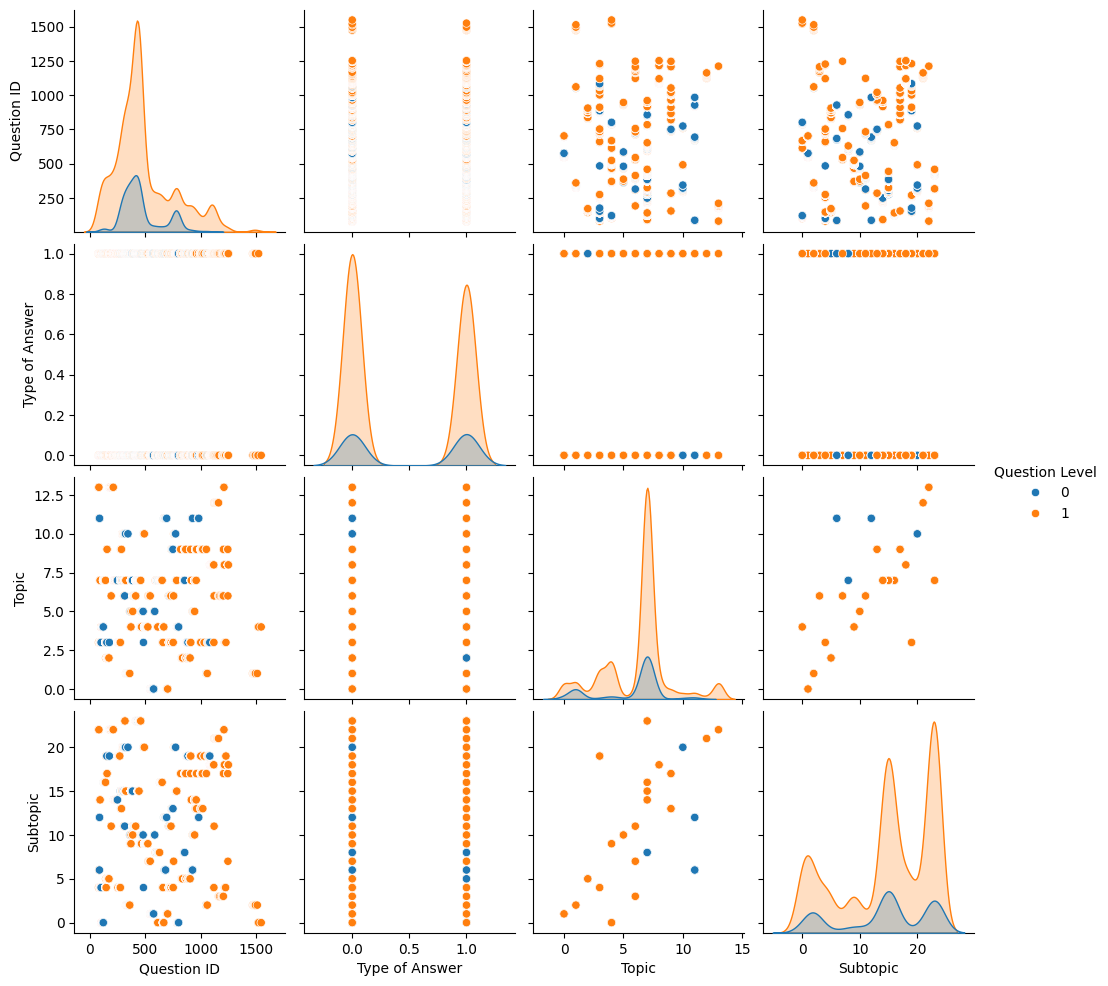

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a filtered DataFrame
data_filtered = data_cleaned.copy()
# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in ['Question Level', 'Topic', 'Subtopic']:
    encoder = LabelEncoder()
    data_filtered[col] = encoder.fit_transform(data_filtered[col])
    label_encoders[col] = encoder
 # plot the pairplot
sns.pairplot(data_filtered, hue="Question Level")
plt.show()

In [46]:
data_filtered.head()

,Question ID,Type of Answer,Question Level,Topic,Subtopic
0,77,0,1,13,22
1,77,1,1,13,22
2,77,1,1,13,22
3,77,0,1,13,22
4,77,1,1,13,22


In [44]:
data_filtered[["Question Level", "Type of Answer"]].value_counts()

Question Level  Type of Answer
1               0                 4227
                1                 3617
0               1                  853
                0                  849
Name: count, dtype: int64

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

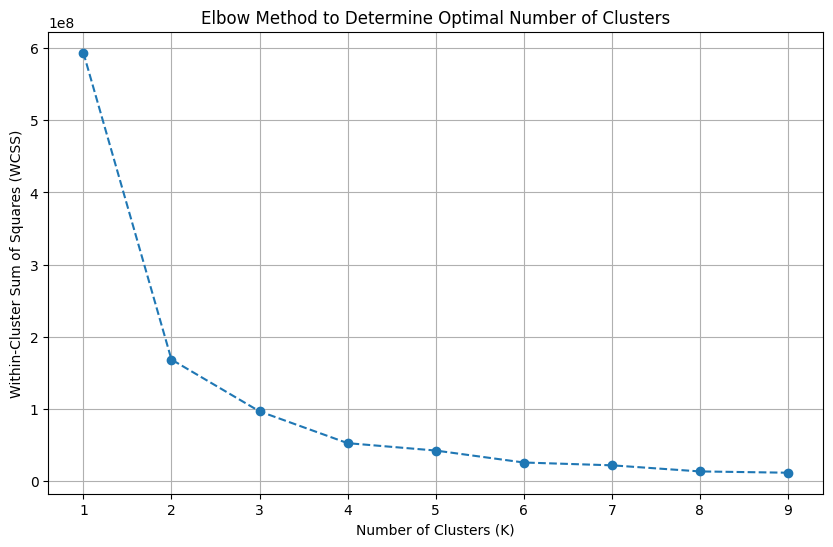

In [47]:
# Using the elbow method to determine the optimal number of clusters
wcss = []
# Calculating WCSS for cluster numbers from 1 to 10
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_filtered)
    wcss.append(kmeans.inertia_)  # WCSS (within-cluster sum of squares)
# Plotting the elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [72]:

# Perform KMeans clustering with an choice of clusters (e.g., 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
data_filtered['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

In [95]:
# Reduce data to 2 dimensions using PCA for visualization
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# # Add PCA components and cluster labels to the dataframe
data_filtered['PCA1'] = data_pca[:, 0]
data_filtered['PCA2'] = data_pca[:, 1]
data_filtered['PCA3'] = data_pca[:, 2]

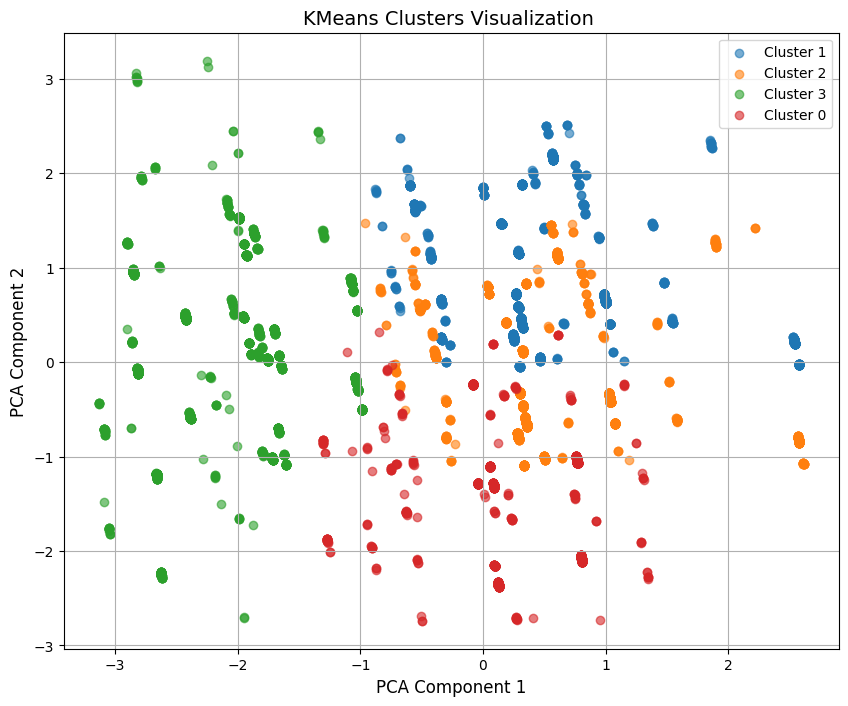

In [178]:
# Visualize the KMeans clusters in 2D using PCA components
plt.figure(figsize=(10, 8))
for cluster_label in data_filtered['KMeans_Cluster'].unique():
    cluster_data = data_filtered[data_filtered['KMeans_Cluster'] == cluster_label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_label}', alpha=0.6)

plt.title('KMeans Clusters Visualization ', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [200]:
# unique subset values
data_filtered["Subtopic"].unique()


array([22,  4,  6, 12, 14,  0, 16,  5, 19, 17, 11, 15, 13, 20, 23,  2, 10,
        9,  7,  1,  8, 18, 21,  3])

In [234]:
#unique topic in cluster 1 for wrong answer. This cluster only contain wrong answers (difficulty=basic leve)
unique_subtopics = data_filtered[(data_filtered["KMeans_Cluster"] == 1) & (data_filtered["Type of Answer"] == 0)]["Subtopic"].unique()

print(unique_subtopics)

[22  6 12 14 16 19 17 11 15 13 20 23 10  7  8 18 21]


In [235]:
#unique topic in cluster 2 for right answer. This cluster only contain right answers(difficulty=basic level)
unique_subtopics = data_filtered[(data_filtered["KMeans_Cluster"] == 2) & (data_filtered["Type of Answer"] == 1)]["Subtopic"].unique()

print(unique_subtopics)

[22  6 12 14 16 19 17 11 15 13 20 23 10  7  8 18 21]


In [231]:
#unique topic in cluster 3 for wrong answer (difficulty=basic level)
unique_subtopics = data_filtered[(data_filtered["KMeans_Cluster"] == 3) & (data_filtered["Type of Answer"] == 0)]["Subtopic"].unique()

print(unique_subtopics)

[4 0 5 2 9 1 3]


In [232]:
#unique topic in cluster 3 for right answer
unique_subtopics = data_filtered[(data_filtered["KMeans_Cluster"] == 3) & (data_filtered["Type of Answer"] == 1)]["Subtopic"].unique()

print(unique_subtopics)

[4 0 5 2 9 1 3]


In [59]:
# Right and wrong answer for cluster 3
Right_Ans = data_filtered[(data_filtered["KMeans_Cluster"] == 3) & (data_filtered["Type of Answer"] == 1)].value_counts().sum()
Wrong_Ans = data_filtered[(data_filtered["KMeans_Cluster"] == 3) & (data_filtered["Type of Answer"] == 0)].value_counts().sum()
print(" Right Answers=",Right_Ans)
print(" Wrong Answers=",Wrong_Ans)

 Right Answers= 985
 Wrong Answers= 1185


In [60]:
#unique topic in cluster 0 for right answer(difficulty= Advance Level)
unique_subtopics = data_filtered[(data_filtered["KMeans_Cluster"] == 0) & (data_filtered["Type of Answer"] == 1)]["Subtopic"].unique()
print(unique_subtopics)

[ 6 12 16 19 15 20 10 11 23  9  8]


In [62]:
#unique topic in cluster 0 for wrong answer(difficulty= Advance Level)
unique_subtopics = data_filtered[(data_filtered["KMeans_Cluster"] == 0) & (data_filtered["Type of Answer"] == 0)]["Subtopic"].unique()
print(unique_subtopics)

[12 16 19 14 15 20 11 10 23  9  8  6 13]


In [63]:
# Right and wrong answers in cluster 0
Right_Ans = data_filtered[(data_filtered["KMeans_Cluster"] == 0) & (data_filtered["Type of Answer"] == 1)].value_counts().sum()
Wrong_Ans = data_filtered[(data_filtered["KMeans_Cluster"] == 0) & (data_filtered["Type of Answer"] == 0)].value_counts().sum()
print(" Right Answers=",Right_Ans)
print(" Wrong Answers=",Wrong_Ans)

 Right Answers= 675
 Wrong Answers= 682


In [54]:
filtered_counts = data_filtered[
    (data_filtered["KMeans_Cluster"] == 3) & (data_filtered["Subtopic"] == 3) & (data_filtered["Type of Answer"] == 0)
].value_counts().sum()

print(filtered_counts)

4


In [81]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)
print("PCA Variance Ratio:",pca.explained_variance_ratio_)
print("Sum:",sum(pca.explained_variance_ratio_))

PCA Variance Ratio: [0.34003765 0.21048918 0.19725251]
Sum: 0.7477793370640717


In [82]:
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_scaled)
print("PCA Variance Ratio:",pca.explained_variance_ratio_)
print("Sum:",sum(pca.explained_variance_ratio_))

PCA Variance Ratio: [0.34003765 0.21048918 0.19725251 0.19062954]
Sum: 0.9384088812674115


In [67]:
# Data point % age in each cluster
from collections import Counter
cluster_counter = Counter(data_filtered['KMeans_Cluster'])
cluster_counter
total_samples = len(data_filtered['KMeans_Cluster'])
cluster_percentages = {cluster: count / total_samples * 100 for cluster, count in cluster_counter.items()}
cluster_percentages

{1: 33.61617431384873,
 2: 29.436413157343388,
 3: 22.732034359941338,
 0: 14.215378168866541}

In [86]:
!pip install scikit-learn
from sklearn.metrics import silhouette_score

In [87]:
#Calculating the Silhouette Score
silhouette_avg = silhouette_score(data_pca, data_filtered['KMeans_Cluster'])
# Displaying the Silhouette Score
silhouette_avg

0.4123822928150314

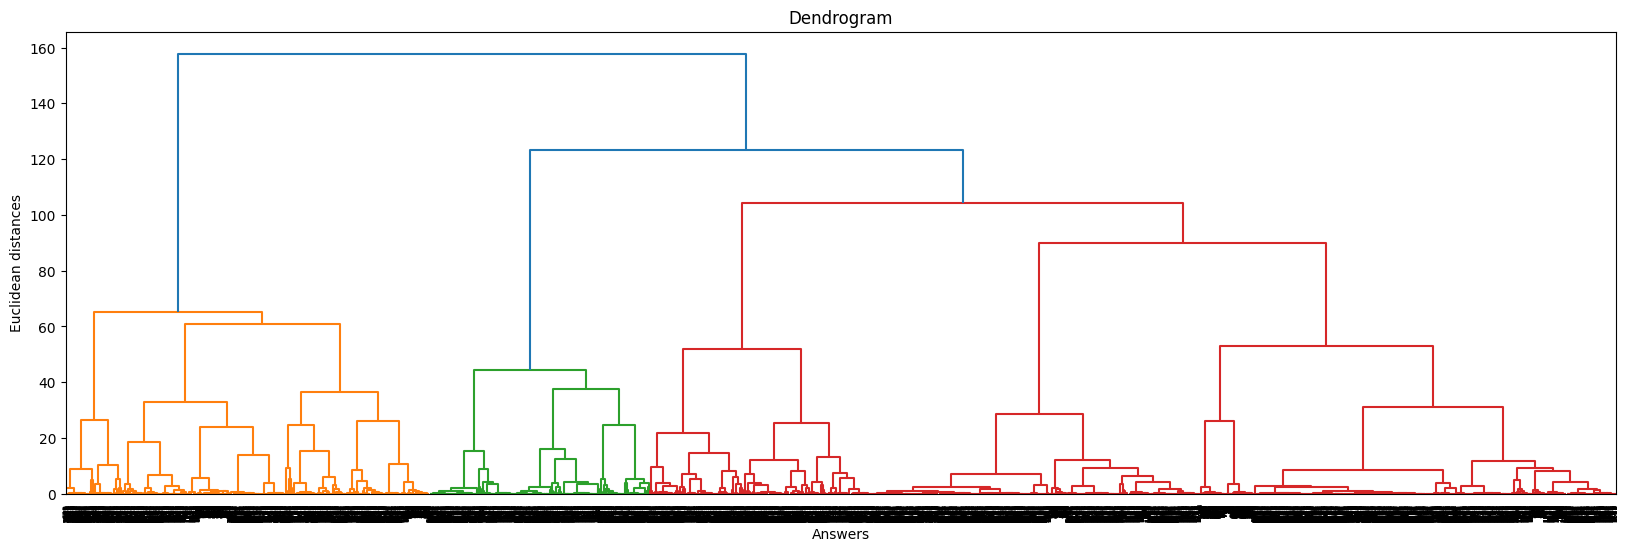

In [89]:
import scipy.cluster.hierarchy as sch
import sys
# Increase the recursion limit
sys.setrecursionlimit(10000)  # Increase if needed

plt.figure(figsize= (20,6))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Answers")
plt.ylabel("Euclidean distances")
plt.show()

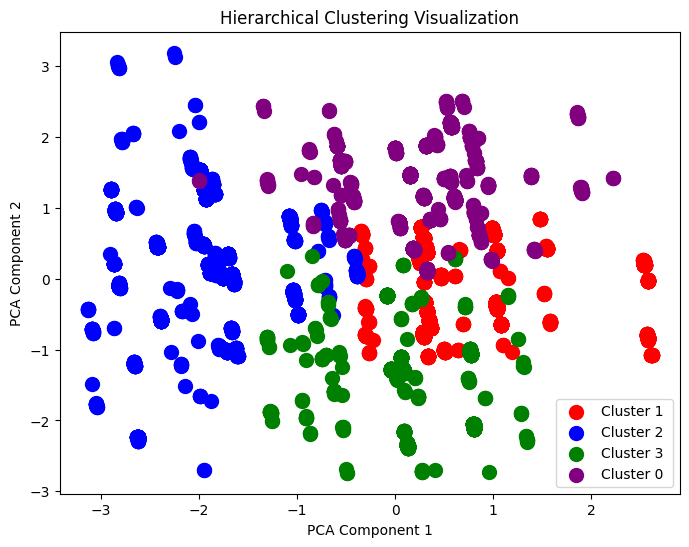

In [90]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
# Perform Agglomerative Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hierarchical_cluster.fit_predict(data_pca)
#  Visualize hierarchical clustering results
plt.figure(figsize=(8, 6))
# Use data_pca for visualization, not 'KMeans_Cluster'
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s=100, c='purple', label='Cluster 0 ')
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [92]:
from collections import Counter
cluster_counter = Counter(y_hc)
cluster_counter
total_samples = len(y_hc)
cluster_percentages = {cluster: count / total_samples * 100 for cluster, count in cluster_counter.items()}
cluster_percentages

{0: 47.915357217682796,
 1: 23.465325790907183,
 2: 14.215378168866541,
 3: 14.403938822543475}

In [94]:
#Calculating the Silhouette Score
silhouette_avg_KMean = silhouette_score(data_pca, data_filtered['KMeans_Cluster'])
silhouette_avg_Hierarchical = silhouette_score(data_pca, y_hc)

# Displaying the Silhouette Score
print("KMean:",silhouette_avg_KMean)
print("Hierarchical:",silhouette_avg_Hierarchical)

KMean: 0.4123822928150314
Hierarchical: 0.3875636452612911
